<a href="https://colab.research.google.com/github/Ragnarok540/sympy-tutorial/blob/main/2_body_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.youtube.com/watch?v=otRtUiCcCh4
# https://www.youtube.com/watch?v=FXkH9-4EN_8

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import animation
from matplotlib.animation import PillowWriter

In [6]:
m0 = 1
m1 = 333000

inital_position_0 =  [1.0,  0.0]
inital_position_1 =  [0.0,  0.0]

inital_velocity_0 =  [0.0, np.sqrt(m1)]
inital_velocity_1 =  [0.0, 0.0]

initial_conditions = np.array([
    inital_position_0, inital_position_1,
    inital_velocity_0, inital_velocity_1
]).ravel()

initial_conditions

array([  1.        ,   0.        ,   0.        ,   0.        ,
         0.        , 577.06152185,   0.        ,   0.        ])

In [7]:
def two_body(S, t):
    pos_0, pos_1 = S[0:2], S[2:4]
    vel_0, vel_1 = S[4:6], S[6:8]

    r01 = np.linalg.norm(pos_0 - pos_1)

    return [vel_0[0],
            vel_0[1],
            vel_1[0],
            vel_1[1],
            m1 / r01**3 * (pos_1[0] - pos_0[0]),
            m1 / r01**3 * (pos_1[1] - pos_0[1]),
            m0 / r01**3 * (pos_0[0] - pos_1[0]),
            m0 / r01**3 * (pos_0[1] - pos_1[1])]

t = np.linspace(0, 1, 10000)

sol = odeint(two_body, y0=initial_conditions, t=t)

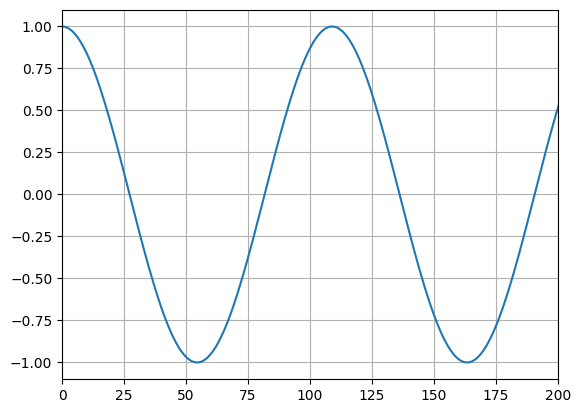

In [8]:
plt.plot(sol.T[0])
plt.xlim(0, 200)
plt.grid()

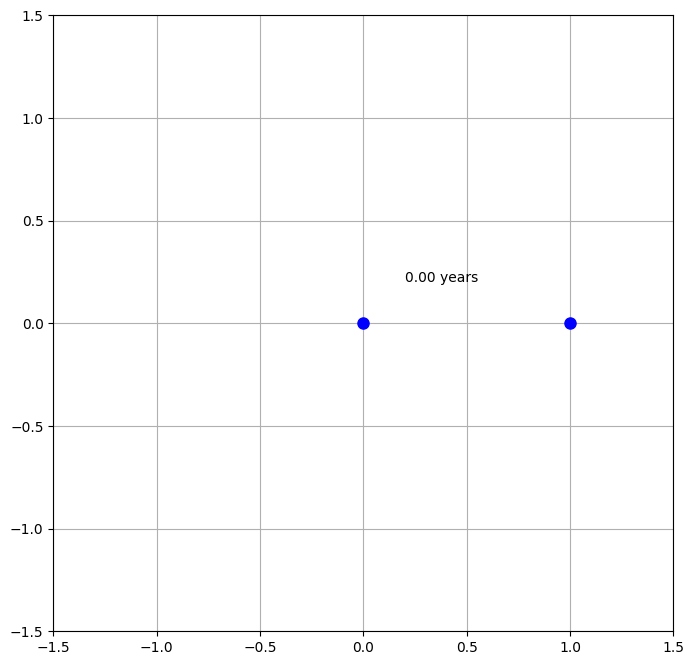

In [15]:
tt = 1 / np.sqrt(6.67e-11 * 5.97e24 / (1.5e11)**3)
tt = tt / (60 * 60 * 24 * 365.25) * np.diff(t)[0]

x1 = sol.T[0]
y1 = sol.T[1]
x2 = sol.T[2]
y2 = sol.T[3]

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.grid()
ln1, = plt.plot([], [], 'bo', markersize=8)
text = plt.text(0.2, 0.2, '')
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-1.5, 1.5)

def animate(i):
    ln1.set_data([x1[i], x2[i]], [y1[i], y2[i]])
    text.set_text(f'{i * tt:.2f} years')

ani = animation.FuncAnimation(fig, animate, frames=400, interval=50)
ani.save('two_body.gif', writer='pillow', fps=30)